In [7]:
election<-read.csv('../data/election_2022.csv')
str(election)
summary(election)
head(election)
# 시군구에 중복되는 이름이 많다(중구,서구 등등)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [75]:
# 광역시도별 투표율 데이터 정제하기 투표율 = 투표수/선거인수
library(dplyr)
election.1 <- arrange(aggregate(투표수~광역시도,election,sum),desc(투표수))

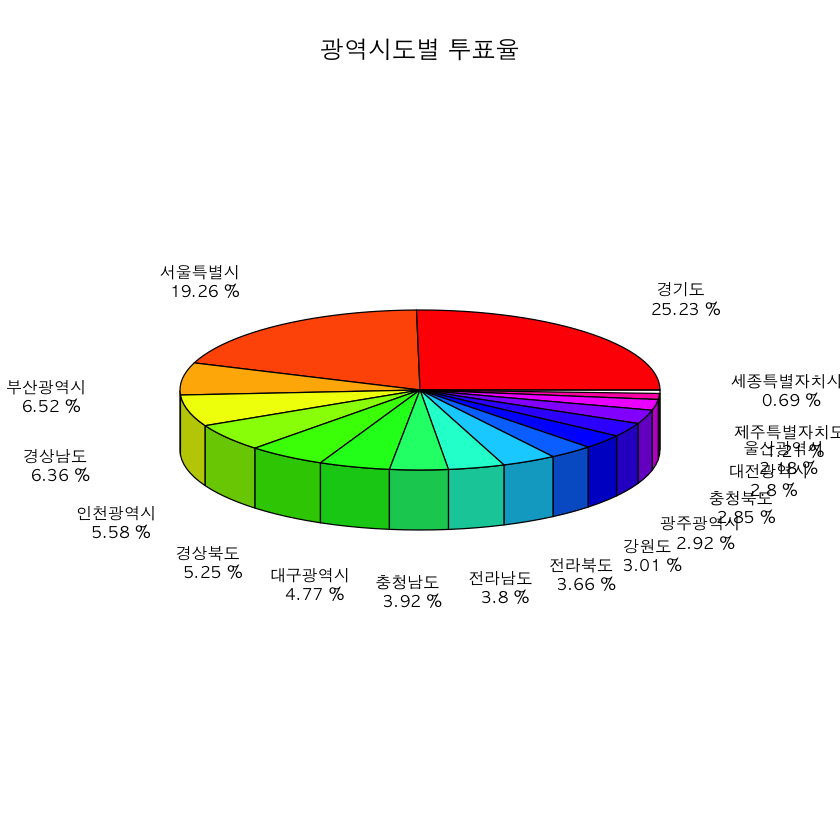

In [99]:
library(plotrix)
광역시도 <- election.1$광역시도
#광역시도
투표율 <- round(election.1$투표수/sum(election.1$투표수)*100,2)
#투표율
label <- paste(광역시도,'\n',투표율,'%')

options(warn=-1)
par(family="AppleGothic",bg='white')
pie3D(arrange(election.1,desc(투표수))$투표수,
    radius = 0.8, # 파이 크기 조절하기 default=1
    main='광역시도별 투표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [76]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum = apply(election[,5:7],1,sum) # apply(dataset,방향,연산)

In [78]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,0.7742598,98417
서울특별시,중구,111448,84998,38244,42906,2310,0.7626696,83460
서울특별시,용산구,199077,152068,60063,85047,4374,0.7638652,149484
서울특별시,성동구,252087,197240,84411,103880,5365,0.7824283,193656
서울특별시,광진구,303582,235471,109922,113733,7072,0.7756422,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,0.7713008,227477


In [79]:
# electionRatio <- 투표수 대비 electionSum의 백분율
election$electionRatio <- round(election$electionSum / election$투표수 *100,2)
# electionRatio3
#election$electionRatio3 <- round(election$이재명/election$투표수*100,2)


In [80]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,0.7742598,98417,97.80
서울특별시,중구,111448,84998,38244,42906,2310,0.7626696,83460,98.19
서울특별시,용산구,199077,152068,60063,85047,4374,0.7638652,149484,98.30
서울특별시,성동구,252087,197240,84411,103880,5365,0.7824283,193656,98.18
서울특별시,광진구,303582,235471,109922,113733,7072,0.7756422,230727,97.99
서울특별시,동대문구,300928,232106,108171,112890,6416,0.7713008,227477,98.01


In [91]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
## 1, arrange
arrange(election,electionRatio)[c(1,length(election$electionRatio)),]

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
1,인천광역시,옹진군,18659,14912,5218,8797,304,0.7991854,14319,96.02
248,경기도,성남시분당구,404493,335434,140966,183094,7005,0.8292702,331065,98.70


In [93]:
## 2, subset
subset(election,electionRatio==max(election$electionRatio))
subset(election,electionRatio==min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,0.8292702,331065,98.7


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,0.7991854,14319,96.02


In [95]:
# election_2022_job1.csv로 저장하기
write.csv(election,'../data/election_2022_job1.csv', row.names=F)
# row.names=F 안하면 계속 열 이름이 추가된다

광역시도,윤석열
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747
세종특별자치시,101491


광역시도,윤석열득표율
경기도,23.7
서울특별시,20.0
경상북도,7.9
부산광역시,7.8
경상남도,7.6
대구광역시,7.4
인천광역시,5.4
충청남도,4.1
강원도,3.4
충청북도,3.0


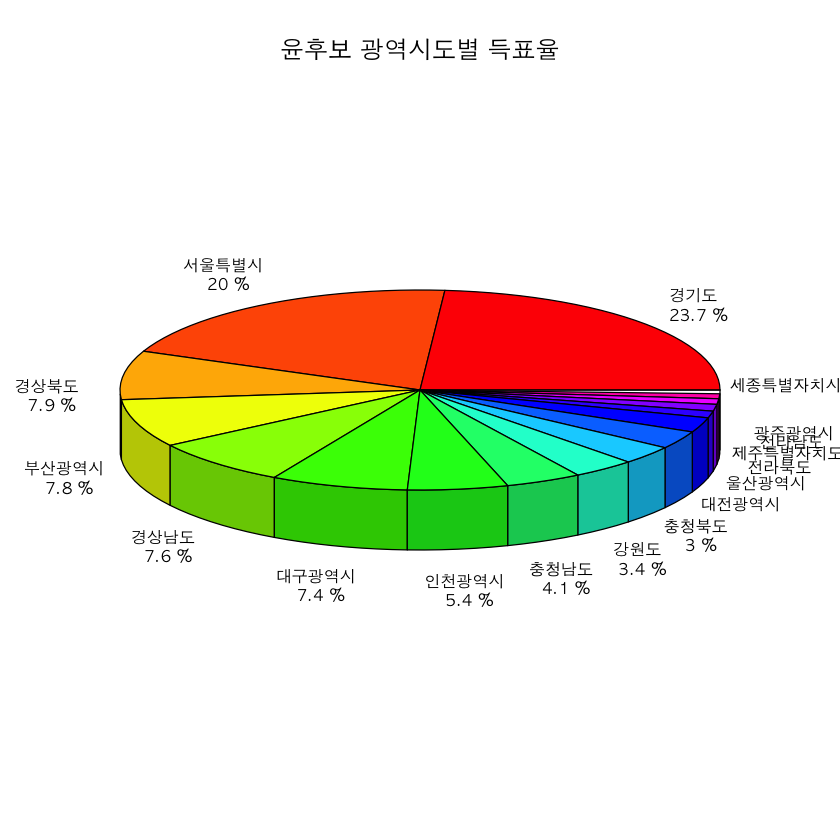

In [123]:
# 각 후보의 광역시도별 득표율을 pie3D 차트로 표현하기(단, 득표율 3% 미만인 광역시도는 수치 없이)
#총투표수 <- aggregate(투표수~광역시도,election,sum)
#총투표수
윤석열 <- aggregate(윤석열~광역시도,election,sum)
윤석열
윤석열.득표율 <- arrange(data.frame(광역시도=윤석열$광역시도,윤석열득표율=round(윤석열$윤석열/sum(윤석열$윤석열)*100,1)),desc(윤석열득표율))
윤석열.득표율

광역시도 <- 윤석열.득표율$광역시도
#광역시도
득표율 <- 윤석열.득표율$윤석열득표율
#득표율
label <- ifelse(득표율>=3,paste(광역시도,'\n',득표율,'%'),paste(광역시도))

par(family="AppleGothic",bg='white')
pie3D(윤석열.득표율$윤석열득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='윤후보 광역시도별 득표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [128]:
# 수도권(경기도,서울,인천)의 전국 대비 투표인구수 백분율은?
round(sum(subset(election,광역시도 %in% c('경기도','서울특별시','인천광역시'))$투표수)/sum(election$투표수) * 100,2)

[1] 50.06

In [153]:
# 윤석열 후보의 서울특별시 top 5 지역은 각 지역명으로, 타지역은 기타로 파이3d 출력하기
electS <- subset(election,광역시도 == '서울특별시') # 서울특별시 데이터만 발췌
# election[election$광역시도=='서울특별시',] # 이런 방식도 가능, python 방식
# seoulY <- arrange(electS,desc(윤석열))[,c(2,6)] # 2번과 6번 열만 가져온다.
# round(c(seoulY[1:5, 2],sum(seoulY[-c(1:5),2]))/sum(seoulY$윤석열)*100,2) # 이 방식은 벡터 방식
seoulY <- arrange(data.frame(시군구=electS$시군구,득표율=round(aggregate(윤석열~시군구,electS,sum)$윤석열/sum(aggregate(윤석열~시군구,electS,sum)$윤석열)*100,2)),desc(득표율))
seoulY
seoulY5 <- rbind(seoulY[1:5,],data.frame(시군구='기타',득표율=sum(seoulY[c(6:nrow(seoulY)),2])))
seoulY5

시군구,득표율
금천구,7.84
종로구,7.25
성동구,5.58
양천구,5.51
강북구,5.02
중구,4.93
광진구,4.67
영등포구,4.60
서초구,4.32
은평구,4.17


시군구,득표율
금천구,7.84
종로구,7.25
성동구,5.58
양천구,5.51
강북구,5.02
기타,68.81


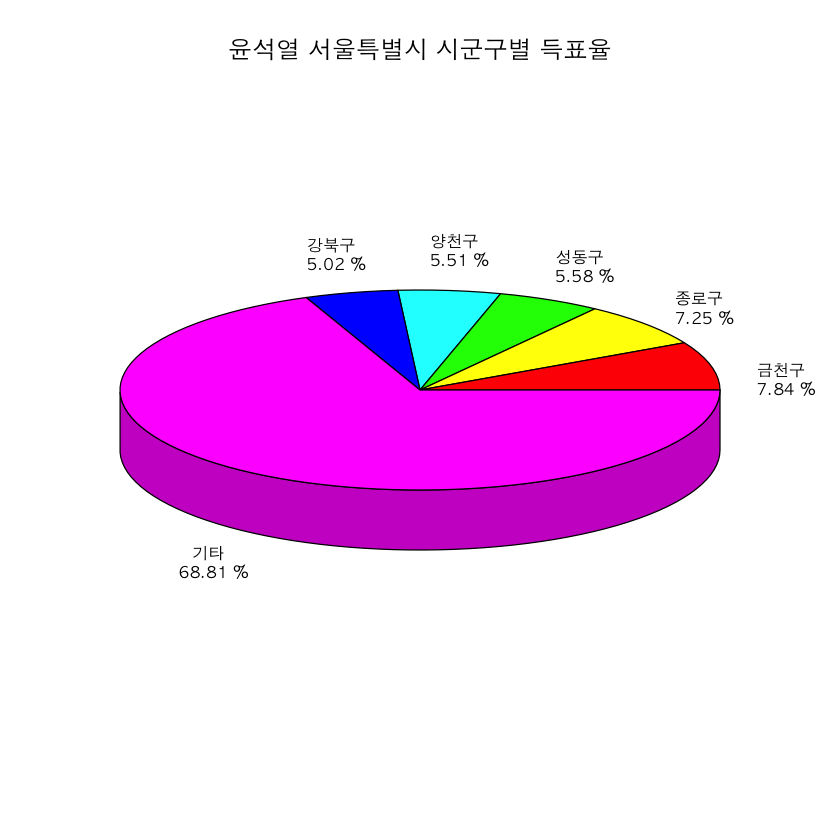

In [152]:
시군구 <- seoulY5$시군구
#시군구
득표율 <- seoulY5$득표율
#득표율
label <- paste(시군구,'\n',득표율,'%')

par(family="AppleGothic",bg='white')
pie3D(seoulY5$득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='윤석열 서울특별시 시군구별 득표율',
    labels=label,
    #explode=0.05, # 쪼개버리기
    labelcex=0.8 # 글자 크기 80%
)

In [188]:
# 대선주자 출생지별 득표율 분석
# 윤석열 후보의 출생지는 서울특별시 성북구
electSS <- electS[electS$시군구=='성북구',]
득표수 <- as.numeric(c(electSS[,c('이재명','윤석열','심상정')],electSS[,'투표수']-sum(electSS[,c('이재명','윤석열','심상정')])))
득표율 <- round(득표수/sum(electSS[,'투표수'])*100,2); 득표율
#이재명 = round(electS[electS$시군구=='성북구','이재명'] / electS[electS$시군구=='성북구','투표수']*100,2);이재명
#윤석열 = round(electS[electS$시군구=='성북구','윤석열'] / electS[electS$시군구=='성북구','투표수']*100,2);윤석열
#심상정 = round(electS[electS$시군구=='성북구','심상정'] / electS[electS$시군구=='성북구','투표수']*100,2);심상정
#기타 = 100 - (이재명+윤석열+심상정);기타
#성북구 = c(이재명,윤석열,심상정,기타);성북구
성북구.득표율=arrange(data.frame(후보=c('이재명','윤석열','심상정','기타'),득표율),desc(득표율));성북구.득표율


[1] 48.84 46.22  3.06  1.88

후보,득표율
이재명,48.84
윤석열,46.22
심상정,3.06
기타,1.88


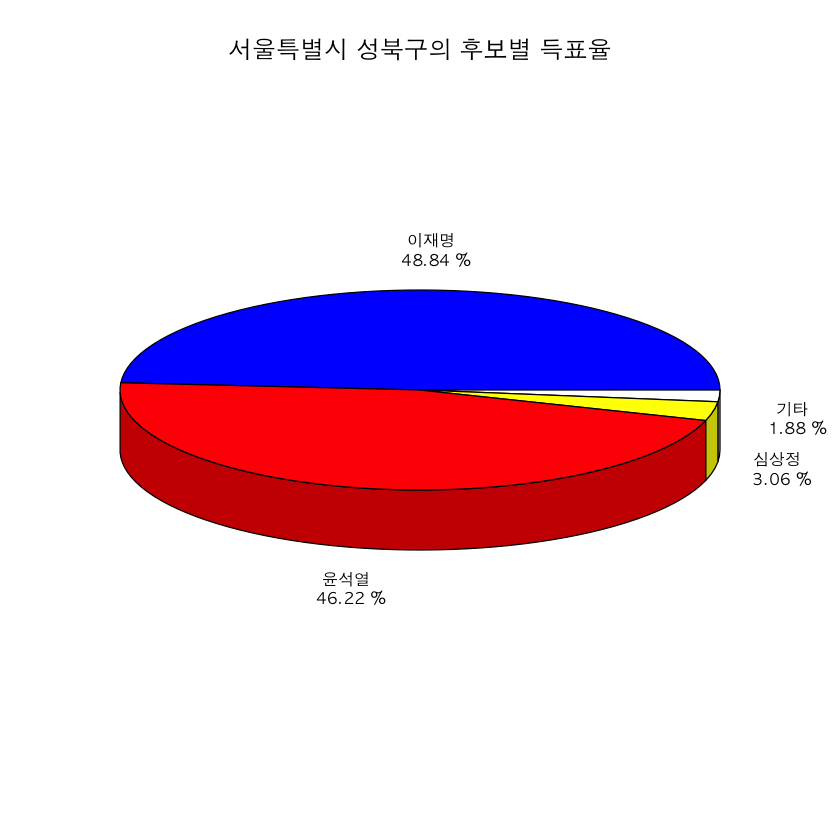

In [189]:
label <- paste(성북구.득표율$후보,'\n',성북구.득표율$득표율,'%')

par(family="AppleGothic",bg='white')
pie3D(성북구.득표율$득표율,
    radius = 1, # 파이 크기 조절하기 default=1
    main='서울특별시 성북구의 후보별 득표율',
    labels=label,
    labelcex=0.8, # 글자 크기 80%
    col = c('blue','red','yellow','white')
)